#  DATA ANALYTICS AND PREDICTION OF NSW HOUSE PRICE

**Project Owner: Brian Ong**
Sydney, 7th May 2024

I.	Introduction
1.	Overview of the Project:
The primary purpose of the project is to analyze the housing market in order to provide the most suitable options for individuals interested in investing the real estate market. Additionally, it aims to identify the most affordable housing options and general insights for potential customers. However, due to the size and reliability of the dataset, all information and result provided is mainly used for practice purposes.
Furthermore, the project involves making predictions for the housing market in the near future. These predictions are compared with other machine learning models to illustrate the most objective results. We aim to provide valuable guidance to individuals considering real estate investment, helping them make informed decisions based on current market trends and future predictions
2.	Objectives of the Project
To address three primary questions:
•	How has the house pricing market in NSW been evolving in recent years?
•	What is the relationship between each variable provided in the dataset?
•	How do different machine learning models perform in predicting house prices, their effectiveness, and the current trends (as of 2022)?
These questions will guide our analysis of the NSW housing market, its variables, and the comparison of machine learning models for predicting house prices.

II.	Data Collection and Preprocessing
1.	Data Source:

    First Dataset: 
www.kaggle.com/datasets/alexlau203/sydney-house-prices
    
    Second Dataset: 
www.kaggle.com/datasets/karltse/sydney-suburbsreviews

2.	Data Loading:

In [1]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import datetime as dt
import statistics
import math

import seaborn as sns 
import plotly.graph_objects as go # map
import plotly.express as px 
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.axes as axes
from matplotlib.ticker import ScalarFormatter
from matplotlib.gridspec import GridSpec # multiple plots

In [2]:
# LOADING DATA
dataset1=pd.read_csv('/kaggle/input/sydney-house-prices/domain_properties.csv')
domain_df=dataset1.copy()
domain_df.head(5)

,price,date_sold,suburb,num_bath,num_bed,num_parking,property_size,type,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd
0,530000,13/1/16,Kincumber,4,4,2,1351,House,7093,29432,9.914,-33.47252,151.40208,24,2.0,150.9,47.05
1,525000,13/1/16,Halekulani,2,4,2,594,House,2538,24752,1.397,-33.21772,151.55237,23,2.0,150.9,78.54
2,480000,13/1/16,Chittaway Bay,2,4,2,468,House,2028,31668,1.116,-33.32678,151.44557,3,2.0,150.9,63.59
3,452000,13/1/16,Leumeah,1,3,1,344,House,9835,32292,4.055,-34.05375,150.83957,81,2.0,150.9,40.12
4,365500,13/1/16,North Avoca,0,0,0,1850,Vacant land,2200,45084,1.497,-33.45608,151.43598,18,2.0,150.9,49.98


In [3]:
domain_df.shape

(11160, 17)

3.	Data Cleaning:

In [4]:
# CHECK DUPLICATE AND NULL DATA
domain_df.drop_duplicates()
domain_df.replace([np.inf, -np.inf], np.nan, inplace=True)
domain_df.isna().sum()

price                       0
date_sold                   0
suburb                      0
num_bath                    0
num_bed                     0
num_parking                 0
property_size               0
type                        0
suburb_population           0
suburb_median_income        0
suburb_sqkm                 0
suburb_lat                  0
suburb_lng                  0
suburb_elevation            0
cash_rate                   0
property_inflation_index    0
km_from_cbd                 0
dtype: int64

4.	Data Exploration:

In [5]:
#EXPLORING FEATURE
domain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11160 entries, 0 to 11159
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     11160 non-null  int64  
 1   date_sold                 11160 non-null  object 
 2   suburb                    11160 non-null  object 
 3   num_bath                  11160 non-null  int64  
 4   num_bed                   11160 non-null  int64  
 5   num_parking               11160 non-null  int64  
 6   property_size             11160 non-null  int64  
 7   type                      11160 non-null  object 
 8   suburb_population         11160 non-null  int64  
 9   suburb_median_income      11160 non-null  int64  
 10  suburb_sqkm               11160 non-null  float64
 11  suburb_lat                11160 non-null  float64
 12  suburb_lng                11160 non-null  float64
 13  suburb_elevation          11160 non-null  int64  
 14  cash_r

1. **Price**: Price of the house. Data type: `int64`.

2. **Date Sold**: Date when the house was sold. Data type: `object`.

3. **Suburb**: Suburb where the house is located. Data type: `object`.

4. **Number of Bathrooms**: Number of bathrooms in the house. Data type: `int64`.

5. **Number of Bedrooms**: Number of bedrooms in the house. Data type: `int64`.

6. **Number of Parking Spaces**: Number of parking spaces associated with the house. Data type: `int64`.

7. **Property Size**: Size of the property in square meters. Data type: `int64`.

8. **Type**: Type of the property (e.g., house, apartment). Data type: `object`.

9. **Suburb Population**: Population of the suburb where the house is located. Data type: `int64`.

10. **Suburb Median Income**: Median income of residents in the suburb. Data type: `int64`.

11. **Suburb Area (Square Kilometers)**: Area of the suburb in square kilometers. Data type: `float64`.

12. **Suburb Latitude**: Latitude coordinate of the suburb. Data type: `float64`.

13. **Suburb Longitude**: Longitude coordinate of the suburb. Data type: `float64`.

14. **Suburb Elevation**: Elevation of the suburb. Data type: `int64`.

15. **Cash Rate**: Cash rate, representing the interest rate set by the Reserve Bank of Australia. Data type: `float64`.

16. **Property Inflation Index**: Index representing inflation in property prices. Data type: `float64`.

17. **Distance from CBD (Kilometers)**: Distance from the Central Business District (CBD) in kilometers. Data type: `float64`.


In [6]:
# DATA CONVERTION
domain_df['date_sold']=pd.to_datetime(domain_df['date_sold'])
domain_df['type'] = domain_df['type'].astype('category')

/tmp/ipykernel_18/737617137.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  domain_df['date_sold']=pd.to_datetime(domain_df['date_sold'])


In [7]:
# FEATURE ENGINEERING
domain_df['price_per_square']=round((domain_df['price']/domain_df['property_size']),1)
domain_df['suburb_income_per_m2']=round((domain_df['suburb_median_income']/(domain_df['suburb_sqkm']*1000)),1)
domain_df['price_k']=round(domain_df['price']/1000,3)
domain_df['year_sold']=domain_df['date_sold'].dt.year

III.	Exploratory Data Analysis (EDA)
1. Summary Statistic

In [8]:
domain_df.describe()

,price,date_sold,num_bath,num_bed,num_parking,property_size,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd,price_per_square,suburb_income_per_m2,price_k,year_sold
count,1.116000e+04,11160,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000
mean,1.675395e+06,2020-02-28 10:06:42.580645120,2.073566,3.758961,2.017473,723.012366,9311.560036,40168.243369,5.054877,-33.781413,151.096676,55.606720,0.631361,188.489686,27.381826,3729.221944,22.407267,1675.395267,2019.555108
min,2.250000e+05,2016-01-11 00:00:00,0.000000,0.000000,0.000000,7.000000,22.000000,14248.000000,0.089000,-34.106240,150.553840,0.000000,0.100000,150.900000,0.310000,16.200000,0.400000,225.000000,2016.000000
25%,1.002000e+06,2018-09-26 00:00:00,1.000000,3.000000,1.000000,430.000000,3977.000000,32448.000000,1.776000,-33.921480,150.951020,21.000000,0.100000,167.600000,12.960000,1519.800000,5.400000,1002.000000,2018.000000
50%,1.388000e+06,2020-11-20 00:00:00,2.000000,4.000000,2.000000,600.000000,7457.000000,39104.000000,3.566000,-33.809180,151.109470,40.000000,0.110000,176.600000,22.310000,2377.250000,10.600000,1388.000000,2020.000000
75%,2.020000e+06,2021-09-23 00:00:00,3.000000,4.000000,2.000000,765.000000,12158.250000,45552.000000,6.568000,-33.715510,151.227810,75.000000,1.500000,220.100000,40.990000,4100.500000,22.525000,2020.000000,2021.000000
max,6.000000e+07,2022-01-01 00:00:00,46.000000,47.000000,50.000000,59100.000000,47176.000000,97500.000000,87.154000,-33.163760,151.573300,405.000000,2.000000,220.100000,84.790000,175000.000000,442.300000,60000.000000,2022.000000
std,1.290371e+06,NaN,1.184881,1.559743,1.454560,1048.983662,7541.636246,11089.955120,5.824663,0.202478,0.213456,52.802315,0.658624,24.441552,18.470113,4446.024989,36.332469,1290.370963,1.740492


In [9]:
#HANDLING OUTLIER

#Check domain df of outlier, if its size small and if remove it improve quality of data, remove it!
print('Domain Data before checking outlier with vancant land: ',domain_df.shape[0])
domain_df_error=domain_df[(domain_df['type']!='Vacant land')&(domain_df['num_bath']==0)&(domain_df['num_bed']==0)&(domain_df['num_parking']==0)]
print('Domain Data not vacant land but all data of living spaces equal zero: ',domain_df_error.shape[0])

#Just 13 rows of outlier data
domain_df=domain_df.drop(domain_df_error.index,axis=0)
print('Domain Data after checking outlier with vancant land: ',domain_df.shape[0])

Domain Data before checking outlier with vancant land:  11160
Domain Data not vacant land but all data of living spaces equal zero:  13
Domain Data after checking outlier with vancant land:  11147


In [10]:
# Second, we start with the vacant_land but the num of living spaces is greater or equal 1, list it in a new data frame
print('Domain Data before checking outlier with vancant land: ',domain_df.shape[0])
vacant_land_category_error=domain_df[((domain_df['num_bath']>0) | (domain_df['num_bed']>0) | (domain_df['num_parking']>0)) &(domain_df['type']=='Vacant land')]
print('Vancant land with number of bed, bath, parking greater than zero: ',vacant_land_category_error.shape[0])

#Remove it!
domain_df=domain_df.drop(vacant_land_category_error.index,axis=0)
print('Domain Data before checking outlier with vancant land: ',domain_df.shape[0])

Domain Data before checking outlier with vancant land:  11147
Vancant land with number of bed, bath, parking greater than zero:  9
Domain Data before checking outlier with vancant land:  11138


In [11]:
vacant_land_category=domain_df[domain_df['type']=='Vacant land']
house_category=domain_df[domain_df['type']!='Vacant land']

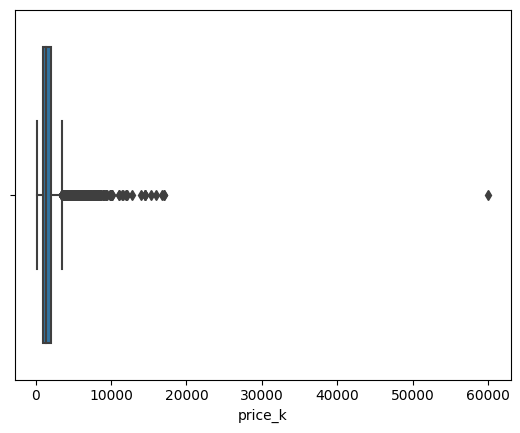

,price,date_sold,suburb,num_bath,num_bed,num_parking,property_size,type,suburb_population,suburb_median_income,...,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd,price_per_square,suburb_income_per_m2,price_k,year_sold
8214,60000000,2021-03-10,Kurraba Point,20,29,19,4240,House,1521,81744,...,-33.84211,151.2228,26,0.1,197.9,2.82,14150.9,347.8,60000.0,2021


In [12]:
sns.boxplot(x=domain_df['price_k'])
plt.show()
domain_df[domain_df['price_k']>50000]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


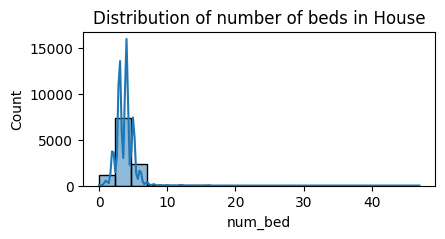

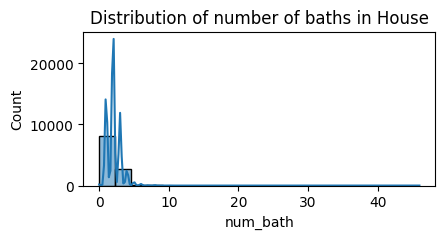

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


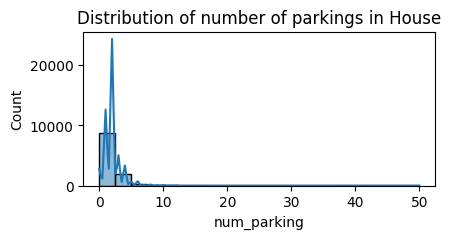

In [13]:
#Handling outlier of data in house type
plt.figure(figsize=(10, 2))
plt.subplot(1, 2, 1)
sns.histplot(house_category['num_bed'], bins=20, kde=True)
plt.title('Distribution of number of beds in House')

plt.figure(figsize=(10, 2))
plt.subplot(1, 2,2)
sns.histplot(house_category['num_bath'], bins=20, kde=True)
plt.title('Distribution of number of baths in House')
plt.show()

plt.figure(figsize=(10, 2))
plt.subplot(1, 2,2)
sns.histplot(house_category['num_parking'], bins=20, kde=True)
plt.title('Distribution of number of parkings in House')
plt.show()

Most data distribured in range (0,10) for number of bedroom and number of parking.And (0,8) for bathromms